In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize
from nltk import PorterStemmer
import seaborn as sns
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
sw = stopwords.words('english')

In [3]:
Data = pd.read_csv('spam.csv',encoding='latin-1', engine = 'python')


In [4]:
Data = pd.DataFrame(Data)
Data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
Data.isnull().value_counts()

v1     v2     Unnamed: 2  Unnamed: 3  Unnamed: 4
False  False  True        True        True          5522
              False       True        True            38
                          False       False            6
                                      True             6
dtype: int64

In [6]:
print(Data.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [7]:
Data.duplicated().sum()
Data = Data.drop_duplicates(keep='first')
print(Data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [8]:
Data = Data.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'])

In [9]:

# Create an instance of the OneHotEncoder
encoder = LabelEncoder()

# Fit and transform the data
encoded_data = pd.DataFrame(encoder.fit_transform(Data[['v1']]))

# Convert the encoded data back to a dataframe
Data = pd.concat([encoded_data,Data['v2']], axis=1)
# Print the encoded dataframe
print(Data)


        0                                                 v2
0     0.0  Go until jurong point, crazy.. Available only ...
1     0.0                      Ok lar... Joking wif u oni...
2     1.0  Free entry in 2 a wkly comp to win FA Cup fina...
3     0.0  U dun say so early hor... U c already then say...
4     0.0  Nah I don't think he goes to usf, he lives aro...
...   ...                                                ...
5567  NaN  This is the 2nd time we have tried 2 contact u...
5568  NaN              Will Ì_ b going to esplanade fr home?
5569  NaN  Pity, * was in mood for that. So...any other s...
5570  NaN  The guy did some bitching but I acted like i'd...
5571  NaN                         Rofl. Its true to its name

[5521 rows x 2 columns]


c:\Python37\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
Data.rename(columns = {0:"spam",'v2':'email'}, inplace = True)

In [11]:
Data['spam'] = Data['spam'].fillna(Data['spam'].median())
Data['spam'].isnull().sum()


0

In [12]:
Data['spam'].value_counts().unique()

array([4868,  653], dtype=int64)

([<matplotlib.patches.Wedge at 0x2232a056560>,
 [Text(-1.0249326785127575, 0.3993907917274312, 'ham'),
  Text(1.0249326411190884, -0.3993908876885529, 'spam')],
 [Text(-0.5590541882796859, 0.217849522760417, '88.17'),
  Text(0.559054167883139, -0.21784957510284703, '11.83')])

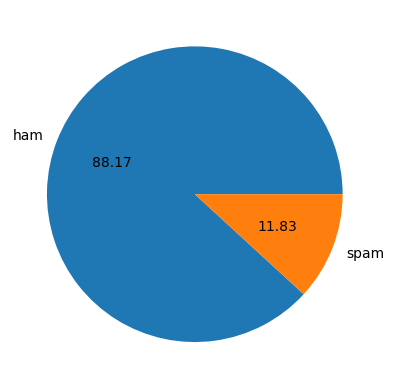

In [13]:
plt.pie(Data['spam'].value_counts().unique(), labels =['ham','spam'], autopct ='%0.2f')

In [14]:
type(Data)

pandas.core.frame.DataFrame

In [15]:
Data

,spam,email
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0.0,This is the 2nd time we have tried 2 contact u...
5568,0.0,Will Ì_ b going to esplanade fr home?
5569,0.0,"Pity, * was in mood for that. So...any other s..."
5570,0.0,The guy did some bitching but I acted like i'd...


In [18]:
Data['number_sent'] = Data['email'].apply(lambda x:len(sent_tokenize(x)))
Data['number_word'] = Data['email'].apply(lambda x:len(word_tokenize(x)))
Data['number_char'] = Data['email'].apply(lambda x:len(list(x)))

In [19]:
Data['words_per_sent'] = Data['number_word']/ Data['number_sent']
Data['char_per_word'] = Data['number_char']/Data['number_word']

In [43]:
puncts = string.punctuation
puncts

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
ps = PorterStemmer()

In [50]:
def text_processing(text):
    text = text.lower()
    text = word_tokenize(text)   
    
    # removing all characters other than alpha numerics
    alphanums = []
    for i in text:
        if i.isalnum():
            alphanums.append(i)
    wo_stop_punc = []
    for i in alphanums:
        if i not in sw and i not in puncts:
            wo_stop_punc.append(i)
   
   
    stemmed = [ps.stem(word) for word in wo_stop_punc]
                          
    return " ".join(stemmed)

In [54]:
Data['email'] = Data['email'].apply(text_processing)
Data

,spam,email,number_sent,number_word,number_char,words_per_sent,char_per_word
0,0.0,go jurong point crazi avail bugi n great world...,2,20,95,10.00,4.750000
1,0.0,ok lar joke wif u oni,2,8,31,4.00,3.875000
2,1.0,free entri 2 wkli comp win fa cup final tkt 21...,2,32,150,16.00,4.687500
3,0.0,u dun say earli hor u c alreadi say,1,11,43,11.00,3.909091
4,0.0,nah think goe usf live around though,1,10,46,10.00,4.600000
...,...,...,...,...,...,...,...
5567,0.0,thi 2nd time tri 2 contact u pound prize 2 cla...,4,27,135,6.75,5.000000
5568,0.0,b go esplanad fr home,1,8,35,8.00,4.375000
5569,0.0,piti mood suggest,2,9,36,4.50,4.000000
5570,0.0,guy bitch act like interest buy someth el next...,1,16,88,16.00,5.500000


In [61]:
import wordcloud 
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=400, min_font_size=10, background_color='white')

In [65]:
spam_wc = wc.generate(Data[Data['spam']==1]['email'])

TypeError: expected string or bytes-like object

In [23]:
x = Data.drop('spam', axis =1)
y = Data['spam']

In [24]:
vectorizer = TfidfVectorizer(max_features=3000)
vect_data =(vectorizer.fit_transform(x['email'])).toarray()
vect_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
x = x.drop(columns=["email",'number_word','number_sent'], axis=1 )

In [26]:
vect_data = pd.DataFrame(vect_data, index=x.index)

In [27]:
x = pd.DataFrame(pd.concat([x,vect_data], axis = 1))


In [28]:
final_data = pd.DataFrame(pd.concat([x,y],axis = 1))
final_data

,number_char,words_per_sent,char_per_word,0,1,2,3,4,5,6,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,spam
0,95,10.00,4.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,31,4.00,3.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,150,16.00,4.687500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
3,43,11.00,3.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,46,10.00,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,135,6.75,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5568,35,8.00,4.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.353059,0.0,0.0,0.0,0.0
5569,36,4.50,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5570,88,16.00,5.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [29]:
correlation = Data.corr()
correlation['spam']

C:\Users\dell\AppData\Local\Temp\ipykernel_21696\3285602909.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Data.corr()


spam              1.000000
number_sent       0.001192
number_word      -0.001180
number_char       0.005826
words_per_sent   -0.003103
char_per_word     0.011701
Name: spam, dtype: float64

In [30]:
x.columns = x.columns.astype(str)
x

,number_char,words_per_sent,char_per_word,0,1,2,3,4,5,6,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,95,10.00,4.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,31,4.00,3.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,150,16.00,4.687500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,43,11.00,3.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,46,10.00,4.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,135,6.75,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5568,35,8.00,4.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.353059,0.0,0.0,0.0
5569,36,4.50,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5570,88,16.00,5.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [31]:
x[['number_char']].describe()

,number_char
count,5521.000000
mean,59.551168
std,48.633865
min,2.000000
25%,25.000000
50%,44.000000
75%,86.000000
max,680.000000


In [32]:
# for not spam
# final_data[final_data['spam']==0][['number_char','number_word','number_sent']].describe()

In [33]:
# spam messages
# final_data[final_data['spam']==1][['number_char','number_word','number_sent']].describe()

<AxesSubplot:xlabel='number_char', ylabel='Count'>

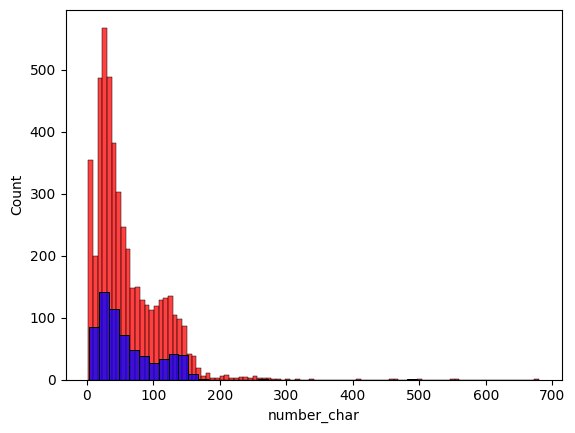

In [34]:
sns.histplot(final_data[final_data['spam']==0]['number_char'], color = 'red')
sns.histplot(final_data[final_data['spam']==1]['number_char'], color = 'blue')




In [35]:
# sns.histplot(final_data[final_data['spam']==0]['number_word'], color = 'red')
# sns.histplot(final_data[final_data['spam']==1]['number_word'], color = 'blue')


In [36]:
# sns.histplot(final_data[final_data['spam']==0]['number_sent'], color = 'red')
# sns.histplot(final_data[final_data['spam']==1]['number_sent'], color = 'blue')


In [37]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [38]:
x_train

,number_char,words_per_sent,char_per_word,0,1,2,3,4,5,6,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
1905,39,9.000000,4.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3469,3,1.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962,60,6.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2692,139,6.500000,5.346154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4037,13,3.000000,4.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,57,3.500000,4.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5197,63,6.500000,4.846154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5243,131,10.333333,4.225806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5424,69,17.000000,4.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
y_train.isnull().sum()

0

In [40]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
y_predict = rf.predict(x_test)


In [42]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8672299336149668